# Stock Price Prediction using LSTM 

# Import Library

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout


# 1. Loading the Data

In [6]:
# Import Train and Test file
train =pd.read_csv(r"C:\Users\AVITA\Downloads\Google_Stock_Price_Train.csv")
test = pd.read_csv(r"C:\Users\AVITA\Downloads\Google_Stock_Price_Test.csv")

In [7]:
train.head() # check Few record of train Data

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [8]:
train.tail()

,Date,Open,High,Low,Close,Volume
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"
1257,12/30/2016,782.75,782.78,770.41,771.82,"1,770,000"


Date from 03.01.2012 to 30.12.2016

In [9]:
test

,Date,Open,High,Low,Close,Volume
0,1/3/2017,778.81,789.63,775.80,786.14,"1,657,300"
1,1/4/2017,788.36,791.34,783.16,786.90,"1,073,000"
2,1/5/2017,786.08,794.48,785.02,794.02,"1,335,200"
3,1/6/2017,795.26,807.90,792.20,806.15,"1,640,200"
4,1/9/2017,806.40,809.97,802.83,806.65,"1,272,400"
5,1/10/2017,807.86,809.13,803.51,804.79,"1,176,800"
6,1/11/2017,805.00,808.15,801.37,807.91,"1,065,900"
7,1/12/2017,807.14,807.39,799.17,806.36,"1,353,100"
8,1/13/2017,807.48,811.22,806.69,807.88,"1,099,200"
9,1/17/2017,807.08,807.14,800.37,804.61,"1,362,100"


### About Dataset:¶
The dataset captures the historical stock price information. offering a comprehensive perspective on the company's financial performance over time. Each record corresponds to a specific date, beginning from January 03, 2012, to December 30, 2016. Here's a breakdown of the dataset columns:

##### Date: The date of the stock price record, providing a chronological timeline for the dataset.
##### Open: The opening price, representing the initial trading price of stock on a given day.
##### High: The highest stock price during a specific period, providing insights into peak price levels.
##### Low: The lowest stock price observed during a defined period, indicating potential fluctuations in value.
##### Close: The closing price, representing the last recorded price at the end of a regular trading session.
##### Volume: Measures the number of shares traded, providing insights into interest and activity in stock.
The dataset spans several decades, making it a valuable resource for various analytical purposes, including trend identification, volatility evaluation, and predictive modeling like the ongoing LSTM-based stock price prediction exploration. This dataset contributes significantly to understanding stock performance in the dynamic financial landscape.

In [10]:
train.shape

(1258, 6)

In [11]:
train.info() # information about the Dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   object 
 5   Volume  1258 non-null   object 
dtypes: float64(3), object(3)
memory usage: 59.1+ KB


### To ensure accurate analysis, we need to convert the data types for the following columns:

###### Date: Currently stored as an object. It should be converted to a date format (datetime) for proper chronological handling.
###### Close and Volume: These columns are also stored as objects but should be numeric (float or int) to allow for accurate calculations and visualizations.
### Converting these columns into the appropriate formats will enhance data manipulation, improve analytical accuracy, and ensure compatibility with various functions for data analysis.

# 2. Data Preprocessing

In [12]:
# Convert Date to Datetime format from Object type
train['Date'] = pd.to_datetime(train['Date'])
test['Date'] = pd.to_datetime(test['Date'])

**NOTE** :- The code converts the Date column in both the train and test datasets from object type to datetime format for easier date-related analysis and operations.

In [13]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   object        
 5   Volume  1258 non-null   object        
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 59.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     object        
dtypes: datetime

(None, None)

In [14]:
# Convert Close to Float format from Object type
train['Close'] = train['Close'].astype(str).replace(',', '', regex=True)
train['Close'] = pd.to_numeric(train['Close'], errors='coerce')

In [15]:
# Remove the , from volume feature for format the dtype from Object to int
train['Volume'] = train['Volume'].astype(str).replace(',', '', regex=True)
train['Volume'] = pd.to_numeric(train['Volume'], errors='coerce')

test['Volume'] = test['Volume'].astype(str).replace(',', '', regex=True)
test['Volume'] = pd.to_numeric(test['Volume'], errors='coerce')

The code performs two key operations:

1. It converts the `Close` column in the `train` dataset from an object type to a float format, ensuring proper handling of numerical values by replacing commas and coercing errors.
2. It processes the `Volume` column in both the `train` and `test` datasets by removing commas, then converting the column from an object type to an integer format using `pd.to_numeric`, allowing for numerical analysis.

In [16]:
train.info(), test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1258 non-null   datetime64[ns]
 1   Open    1258 non-null   float64       
 2   High    1258 non-null   float64       
 3   Low     1258 non-null   float64       
 4   Close   1258 non-null   float64       
 5   Volume  1258 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 59.1 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    20 non-null     datetime64[ns]
 1   Open    20 non-null     float64       
 2   High    20 non-null     float64       
 3   Low     20 non-null     float64       
 4   Close   20 non-null     float64       
 5   Volume  20 non-null     int64         
dtypes: datetime64

(None, None)

In [17]:
test = pd.concat([train.tail(58), test], axis=0)

train = train.iloc[:1200 , 0: ]

In [18]:
train.set_index('Date', inplace = True) # set Date column as index
train.sort_index(inplace = True) # sort the Index

test.set_index('Date', inplace = True) # set Date column as index
test.sort_index(inplace = True) # sort the Index

The code sets the Date column as the index for both train and test datasets and sorts the index to organize the data chronologically.

In [19]:
train.describe() # central tendency analysis of Data

,Open,High,Low,Close,Volume
count,1200.000000,1200.000000,1200.000000,1200.00000,1.200000e+03
mean,521.784192,525.880433,517.180208,709.44445,3.225123e+06
std,145.224780,146.310264,143.912346,167.98047,2.300469e+06
min,279.120000,281.210000,277.220000,491.20000,7.900000e+03
25%,398.642500,401.332500,394.960000,574.32500,1.645300e+06
50%,533.950000,538.285000,529.730000,683.37500,2.663400e+06
75%,612.642500,620.822500,605.015000,776.50250,4.187950e+06
max,786.590000,789.870000,784.150000,1216.83000,2.497790e+07


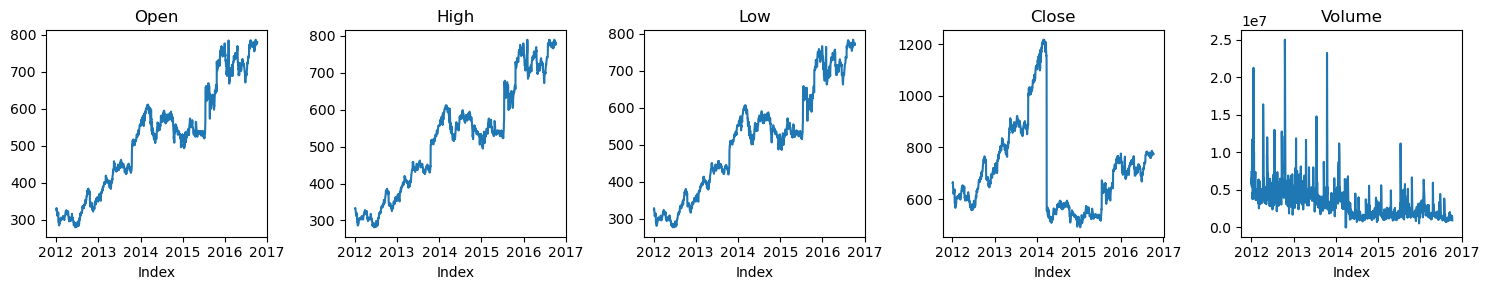

In [20]:
plt.figure(figsize=(15, 3))

# Iterate through columns and create subplots
for i, col in enumerate(train.columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(1, len(train.columns), i)  # Create a subplot for each column
    sns.lineplot(data=train, y=col, x=train.index)
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()

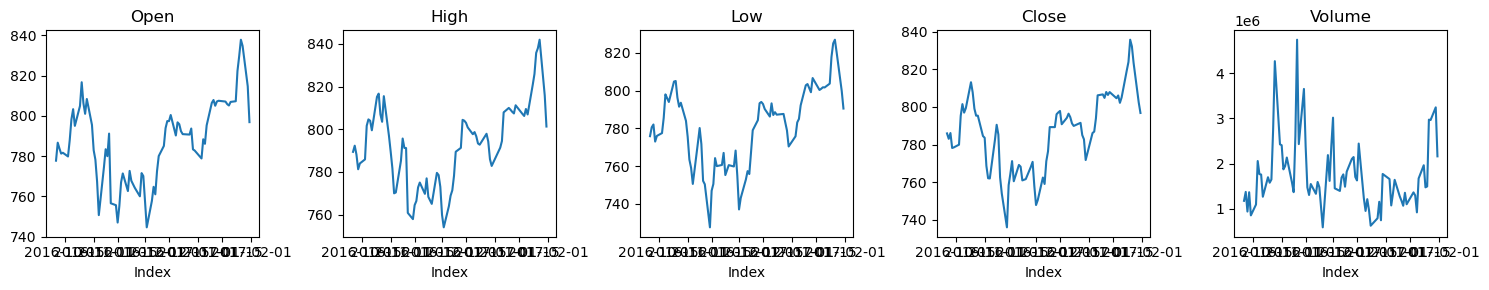

In [21]:
plt.figure(figsize=(15, 3))

# Iterate through columns and create subplots
for i, col in enumerate(test.columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(1, len(test.columns), i)  # Create a subplot for each column
    sns.lineplot(data=test, y=col, x=test.index)
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()

# Handling Data Issues in the Dataset
Upon analyzing the dataset, we observed discrepancies in the Closing Price values. Specifically:

The Closing Price is unrealistically high compared to the Opening Price.
The Closing Price does not align with the reported Day High Price, suggesting errors or inconsistencies in the data.
These issues render the affected rows unreliable for modeling purposes. As approximately 45% of the dataset is impacted, imputation methods such as using the mean, median, or mode are not viable, as they could introduce significant bias or distort patterns in the data.

Resolution:

We will exclude these records from the dataset to ensure the quality and integrity of the data used for training the model.

In [22]:
train.iloc[ 550: 570]

,Open,High,Low,Close,Volume
Date,,,,,
2014-03-13,601.72,602.99,590.17,1185.80,4708600
2014-03-14,588.79,593.21,584.08,1169.59,4604900
2014-03-17,587.42,596.30,586.86,1188.84,4340300
2014-03-18,595.10,603.50,594.30,1207.94,3643500
2014-03-19,603.64,603.73,594.97,1195.97,3237800
2014-03-20,597.73,602.55,595.45,1193.88,3381900
2014-03-21,600.90,602.56,589.02,1179.80,6441000
2014-03-24,589.88,590.24,570.84,1154.76,6096800
2014-03-25,580.82,582.74,571.36,1155.55,4838400


In [23]:
train.iloc[ 0:560, 3 ] = train.iloc[ 0:560, 3] / 2

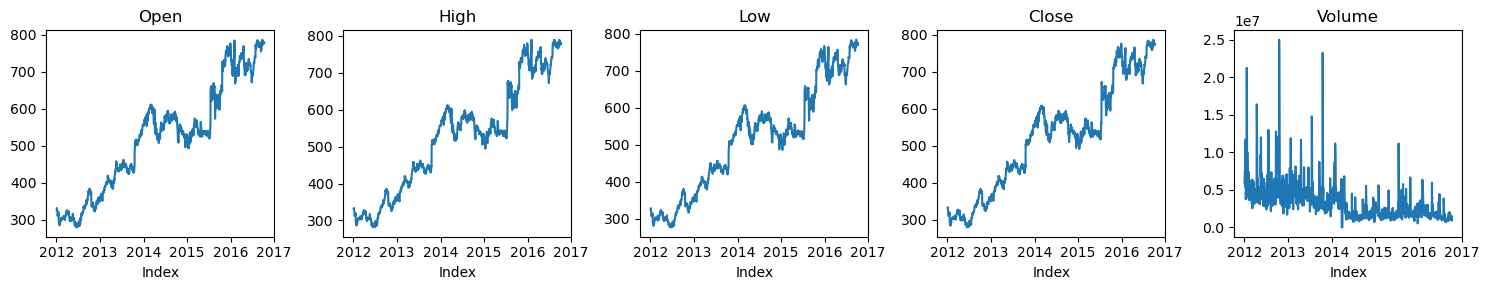

In [24]:
plt.figure(figsize=(15, 3))

# Iterate through columns and create subplots
for i, col in enumerate(train.columns, 1):  # Start enumeration at 1 for subplot indexing
    plt.subplot(1, len(train.columns), i)  # Create a subplot for each column
    sns.lineplot(data=train, y=col, x=train.index)
    plt.title(col)  # Set title for each subplot
    plt.ylabel('')  # Hide y-axis label
    plt.xlabel('Index')  # Label x-axis as Index

plt.tight_layout()  # Adjust subplots to fit in figure area
plt.show()

In [25]:
train.isna().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [26]:
train

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,331.795,7380500
2012-01-04,331.27,333.87,329.08,333.225,5749400
2012-01-05,329.83,330.75,326.89,328.605,6590300
2012-01-06,328.34,328.77,323.68,324.120,5405900
2012-01-09,322.04,322.29,309.46,310.380,11688800
...,...,...,...,...,...
2016-10-03,774.25,776.07,769.50,772.560,1278800
2016-10-04,776.03,778.71,772.89,776.430,1201400
2016-10-05,779.31,782.07,775.65,776.470,1461200


In [27]:
train.head()

,Open,High,Low,Close,Volume
Date,,,,,
2012-01-03,325.25,332.83,324.97,331.795,7380500
2012-01-04,331.27,333.87,329.08,333.225,5749400
2012-01-05,329.83,330.75,326.89,328.605,6590300
2012-01-06,328.34,328.77,323.68,324.120,5405900
2012-01-09,322.04,322.29,309.46,310.380,11688800


In [28]:
scaler = MinMaxScaler()
train = scaler.fit_transform(train)
train

array([[0.09090193, 0.10148233, 0.09419446, 0.10430721, 0.29525831],
       [0.1027647 , 0.10352691, 0.10230209, 0.10711968, 0.22993592],
       [0.09992709, 0.09739315, 0.09798197, 0.09803324, 0.26361233],
       ...,
       [0.98565432, 0.98466559, 0.9832324 , 0.97887698, 0.05820184],
       [0.98504345, 0.98153973, 0.98301541, 0.97964402, 0.04256308],
       [0.98634402, 0.97992765, 0.97356637, 0.97614318, 0.03705647]])

The code scales the train dataset to a range between 0 and 1 using Min-Max scaling for normalization.

In [29]:
X_train = []

y_train = []

In [30]:
train.shape[0]

1200

In [31]:
time_stemp = 5
for i in range (time_stemp,train.shape[0]):
    X_train.append(train[i - time_stemp:i])
    y_train.append(train[i,0])

In [32]:
X_train, y_train = np.array(X_train), np.array(y_train)

In [33]:
X_train.shape,y_train.shape

((1195, 5, 5), (1195,))


**NOTE:-** The code creates sequences of 5 time steps (time_step = 5) from the train dataset, preparing X_train as input features of shape (1195, 5, 5) and y_train as corresponding target values of shape (1195,) for time-series modeling.

In [34]:
X_train

array([[[0.09090193, 0.10148233, 0.09419446, 0.10430721, 0.29525831],
        [0.1027647 , 0.10352691, 0.10230209, 0.10711968, 0.22993592],
        [0.09992709, 0.09739315, 0.09798197, 0.09803324, 0.26361233],
        [0.09699096, 0.09350057, 0.09164973, 0.08921231, 0.21617942],
        [0.08457643, 0.08076122, 0.06359852, 0.06218901, 0.46779736]],

       [[0.1027647 , 0.10352691, 0.10230209, 0.10711968, 0.22993592],
        [0.09992709, 0.09739315, 0.09798197, 0.09803324, 0.26361233],
        [0.09699096, 0.09350057, 0.09164973, 0.08921231, 0.21617942],
        [0.08457643, 0.08076122, 0.06359852, 0.06218901, 0.46779736],
        [0.06814196, 0.06784493, 0.05933758, 0.06284787, 0.35306768]],

       [[0.09992709, 0.09739315, 0.09798197, 0.09803324, 0.26361233],
        [0.09699096, 0.09350057, 0.09164973, 0.08921231, 0.21617942],
        [0.08457643, 0.08076122, 0.06359852, 0.06218901, 0.46779736],
        [0.06814196, 0.06784493, 0.05933758, 0.06284787, 0.35306768],
        [0.06201

## Bulid LSTM

In [35]:
X_train.shape[1]

5

In [36]:
model = Sequential()

# First LSTM layer
model.add(LSTM(units=128, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], 5)))
model.add(Dropout(0.2))  # Slightly increased dropout to prevent overfitting

# Second LSTM layer (increased units for better feature learning)
model.add(LSTM(units=128, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Third LSTM layer (increased units for enhanced performance)
model.add(LSTM(units=64, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Fourth LSTM layer
model.add(LSTM(units=32, activation='relu'))
model.add(Dropout(0.2))

# Dense layer for final output
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary to check the architecture
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 128)              │          68,608 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 5, 128)              │         131,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 5, 64)               │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 5, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 262,049 (1023.63 KB)

 Trainable params: 262,049 (1023.63 KB)

 Non-trainable params: 0 (0.00 B)

The code defines and compiles an LSTM-based sequential model with four LSTM layers (of varying units) and dropout layers to prevent overfitting, followed by a dense layer for predicting a single output, optimized using the Adam optimizer with a mean squared error loss function.

In [37]:
model.fit(X_train, y_train, epochs = 100, batch_size = 30)

Epoch 1/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - loss: 0.2197
Epoch 2/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0165
Epoch 3/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0108
Epoch 4/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0082
Epoch 5/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0077
Epoch 6/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0087
Epoch 7/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0079
Epoch 8/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0075
Epoch 9/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0070
Epoch 10/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0060
Epoch 11/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0056
Epoch 12/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0062
Epoch 13/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0061
Epoch 14/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0054
Epoch 15/100
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - l

The code trains the model on the X_train and y_train data for 100 epochs with a batch size of 30, allowing the model to learn patterns in the training data over multiple iterations.

In [38]:
test

,Open,High,Low,Close,Volume
Date,,,,,
2016-10-10,777.71,789.38,775.87,785.94,1174900
2016-10-11,786.66,792.28,780.58,783.07,1372500
2016-10-12,783.76,788.13,782.06,786.14,937400
2016-10-13,781.22,781.22,773.00,778.19,1365300
2016-10-14,781.65,783.95,776.00,778.53,852500
...,...,...,...,...,...
2017-01-25,829.62,835.77,825.06,835.67,1494500
2017-01-26,837.81,838.00,827.01,832.15,2973900
2017-01-27,834.71,841.95,820.44,823.31,2965800


In [39]:
test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 78 entries, 2016-10-10 to 2017-01-31
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    78 non-null     float64
 1   High    78 non-null     float64
 2   Low     78 non-null     float64
 3   Close   78 non-null     float64
 4   Volume  78 non-null     int64  
dtypes: float64(4), int64(1)
memory usage: 3.7 KB


In [40]:
test.describe()

,Open,High,Low,Close,Volume
count,78.000000,78.000000,78.000000,78.000000,7.800000e+01
mean,787.390513,792.760641,780.949487,786.707564,1.742928e+06
std,20.262766,19.016560,20.872477,20.138046,7.660770e+05
min,744.590000,754.000000,727.540000,736.080000,5.874000e+05
25%,772.517500,778.757500,764.922500,770.927500,1.277900e+06
50%,788.105000,793.030000,783.600000,789.280000,1.589100e+06
75%,802.725000,805.807500,795.525000,799.295000,2.092300e+06
max,837.810000,841.950000,827.010000,835.670000,4.745200e+06


In [41]:
inputs = scaler.fit_transform(test)
inputs

array([[0.35528856, 0.40227402, 0.48587514, 0.50065268, 0.14130069],
       [0.451298  , 0.4352473 , 0.5332261 , 0.47183452, 0.18882582],
       [0.4201888 , 0.3880614 , 0.54810496, 0.50266091, 0.08417913],
       [0.39294143, 0.30949403, 0.45702222, 0.42283362, 0.18709414],
       [0.39755417, 0.34053439, 0.48718206, 0.42624762, 0.06375968],
       [0.37770865, 0.36213758, 0.50226199, 0.44060649, 0.12160277],
       [0.46406351, 0.5413303 , 0.58339198, 0.59423637, 0.3534321 ],
       [0.57552027, 0.57532689, 0.70865588, 0.65689326, 0.28365963],
       [0.62980047, 0.56816373, 0.68854931, 0.61140677, 0.28142287],
       [0.54076378, 0.5173394 , 0.66814115, 0.63550557, 0.16325942],
       [0.64696417, 0.69562251, 0.77691766, 0.77347123, 0.26699216],
       [0.7733319 , 0.71267766, 0.78013471, 0.71884727, 0.23786618],
       [0.6624115 , 0.60238772, 0.69146476, 0.63249322, 0.25501467],
       [0.60512766, 0.56270608, 0.64300794, 0.59514007, 0.51993843],
       [0.6839734 , 0.69914724, 0.

The code normalizes the `test` dataset using Min-Max scaling, transforming its values to a range between 0 and 1 for consistency with the training data.

In [42]:
X_test = []
y_test = []

In [43]:
for i in range(time_stemp,inputs.shape[0]):
    X_test.append(inputs[i-time_stemp:i])
    y_test.append(inputs[i,0])

In [44]:
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape,y_test.shape


((73, 5, 5), (73,))

In [45]:
y_test

array([0.37770865, 0.46406351, 0.57552027, 0.62980047, 0.54076378,
       0.64696417, 0.7733319 , 0.6624115 , 0.60512766, 0.6839734 ,
       0.54580562, 0.41085604, 0.36054495, 0.24308088, 0.06511478,
       0.32085389, 0.41632697, 0.37921047, 0.49967818, 0.12819138,
       0.1181077 , 0.025531  , 0.11381678, 0.23954087, 0.28727741,
       0.19330616, 0.30079382, 0.24822999, 0.21100622, 0.16530787,
       0.28899378, 0.2733319 , 0.13784596, 0.        , 0.14074233,
       0.21604806, 0.17603519, 0.29918472, 0.37985411, 0.43391976,
       0.52896374, 0.56650933, 0.56586569, 0.59869127, 0.48948723,
       0.55964385, 0.54977473, 0.51244368, 0.49678181, 0.4944218 ,
       0.52681828, 0.41557606, 0.40935422, 0.36708861, 0.46953443,
       0.44507616, 0.54355289, 0.66305514, 0.67871701, 0.6480369 ,
       0.67099335, 0.67464064, 0.67034971, 0.65672602, 0.64932418,
       0.66852607, 0.67217335, 0.83361939, 0.91214332, 1.        ,
       0.96674533, 0.75166273, 0.56071658])

In [46]:
y_pred = model.predict(X_test)
y_pred

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 808ms/step


array([[0.45181784],
       [0.43140915],
       [0.44007567],
       [0.4834664 ],
       [0.5399146 ],
       [0.58787674],
       [0.63337064],
       [0.66355085],
       [0.6709926 ],
       [0.66050565],
       [0.6652115 ],
       [0.64229167],
       [0.6014519 ],
       [0.5472349 ],
       [0.48526728],
       [0.38841182],
       [0.32542363],
       [0.3173028 ],
       [0.35235438],
       [0.40861887],
       [0.43787062],
       [0.3498866 ],
       [0.24200544],
       [0.15779284],
       [0.11186686],
       [0.12413006],
       [0.23559374],
       [0.2681126 ],
       [0.29702547],
       [0.28267002],
       [0.2802006 ],
       [0.28634152],
       [0.2704125 ],
       [0.26337552],
       [0.23820537],
       [0.19475636],
       [0.15146571],
       [0.13993937],
       [0.20020449],
       [0.2733445 ],
       [0.35046074],
       [0.4480297 ],
       [0.5330028 ],
       [0.5815647 ],
       [0.6002902 ],
       [0.5979685 ],
       [0.5860075 ],
       [0.582

In [47]:
y_test

array([0.37770865, 0.46406351, 0.57552027, 0.62980047, 0.54076378,
       0.64696417, 0.7733319 , 0.6624115 , 0.60512766, 0.6839734 ,
       0.54580562, 0.41085604, 0.36054495, 0.24308088, 0.06511478,
       0.32085389, 0.41632697, 0.37921047, 0.49967818, 0.12819138,
       0.1181077 , 0.025531  , 0.11381678, 0.23954087, 0.28727741,
       0.19330616, 0.30079382, 0.24822999, 0.21100622, 0.16530787,
       0.28899378, 0.2733319 , 0.13784596, 0.        , 0.14074233,
       0.21604806, 0.17603519, 0.29918472, 0.37985411, 0.43391976,
       0.52896374, 0.56650933, 0.56586569, 0.59869127, 0.48948723,
       0.55964385, 0.54977473, 0.51244368, 0.49678181, 0.4944218 ,
       0.52681828, 0.41557606, 0.40935422, 0.36708861, 0.46953443,
       0.44507616, 0.54355289, 0.66305514, 0.67871701, 0.6480369 ,
       0.67099335, 0.67464064, 0.67034971, 0.65672602, 0.64932418,
       0.66852607, 0.67217335, 0.83361939, 0.91214332, 1.        ,
       0.96674533, 0.75166273, 0.56071658])

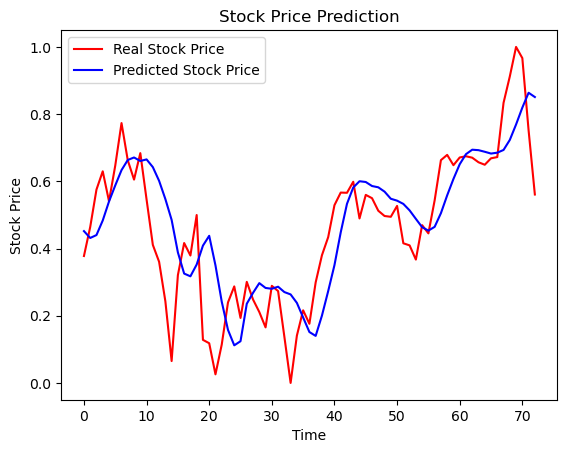

In [48]:
# Visualize the results
plt.plot(y_test, color='red', label='Real Stock Price')  # Plot actual 'Open' prices in red
plt.plot(y_pred, color='blue', label='Predicted Stock Price')  # Plot predicted 'Open' prices in blue
plt.title('Stock Price Prediction')  # Title of the plot
plt.xlabel('Time')  # X-axis label
plt.ylabel('Stock Price')  # Y-axis label
plt.legend()  # Display legend to differentiate actual vs. predicted prices
plt.show()

In [49]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.5982709566369395

**NOTE** : The r2 score value is **0.63**

The R-squared score of 0.63 indicates that 63% of the variance in the dependent variable is explained by the independent variable(s) in the model. This suggests a moderate level of explanatory power, but there's still a considerable amount of variance not captured by the model.